In [ ]:
!pip install geopandas

In [ ]:
!pip install -U matplotlib


     |████████████████████████████████| 10.3 MB 41.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install pyproj==1.9.6

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     |████████████████████████████████| 2.8 MB 29.7 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702478 sha256=1b8725c2edec157793fe7b8baeae21cac4bc3122fdd6ac21212c41aeb958ea39
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.2.1
    Uninstalling pyproj-3.2.1:
      Successfully uninstalled pyproj-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geopandas 0.9.0 requires pyproj>=2.2.0, but you have pyproj 1.9.6 which is incompatible.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex '

In [1]:
import pandas as pd 
import geopandas as gpd 
from shapely.geometry import Point
%matplotlib inline

In [2]:
from shapely.geometry import Polygon

In [3]:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (60,60)
plt.rc('legend',fontsize=100)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
!unzip "/content/Census_Tracts_2020.zip"

Archive:  /content/Census_Tracts_2020.zip
  inflating: Census_Tracts_2020.shp  
  inflating: Census_Tracts_2020.shx  
  inflating: Census_Tracts_2020.dbf  
 extracting: Census_Tracts_2020.cpg  
  inflating: Census_Tracts_2020.prj  
  inflating: Census_Tracts_2020.xml  


In [ ]:
counties = gpd.read_file("/content/Census_Tracts_2020.shp")
counties.head()

,OBJECTID,CT20,LABEL,ShapeSTAre,ShapeSTLen,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28494 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28101 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28735 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [ ]:
sensor_count_df = pd.read_csv("Sensor Counts.csv")
sensor_count_df.head()

,OBJECTID,CT20,LABEL,ShapeSTAre,ShapeSTLen,geometry,Arterial_Sensor_Count,Highway_Sensor_Count
0,1,101110,1011.10,1.229562e+07,15083.854287,POLYGON ((-118.2849112110134 34.25948387660465...,0,0
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.2901512136107 34.2741708780824,...",0,0
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.2810042106021 34.2559208764382,...",3,0
3,4,101221,1012.21,3.812000e+06,9161.710543,POLYGON ((-118.2873452108878 34.25590887623749...,2,0
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.285936210981 34.25404987550476,...",4,0


In [ ]:
counties['Arterial_Sensor_Count'] = sensor_count_df['Arterial_Sensor_Count']
counties['Highway_Sensor_Count'] = sensor_count_df['Highway_Sensor_Count']


In [ ]:
counties["Total_Sensors"] = counties["Arterial_Sensor_Count"]+counties["Highway_Sensor_Count"]

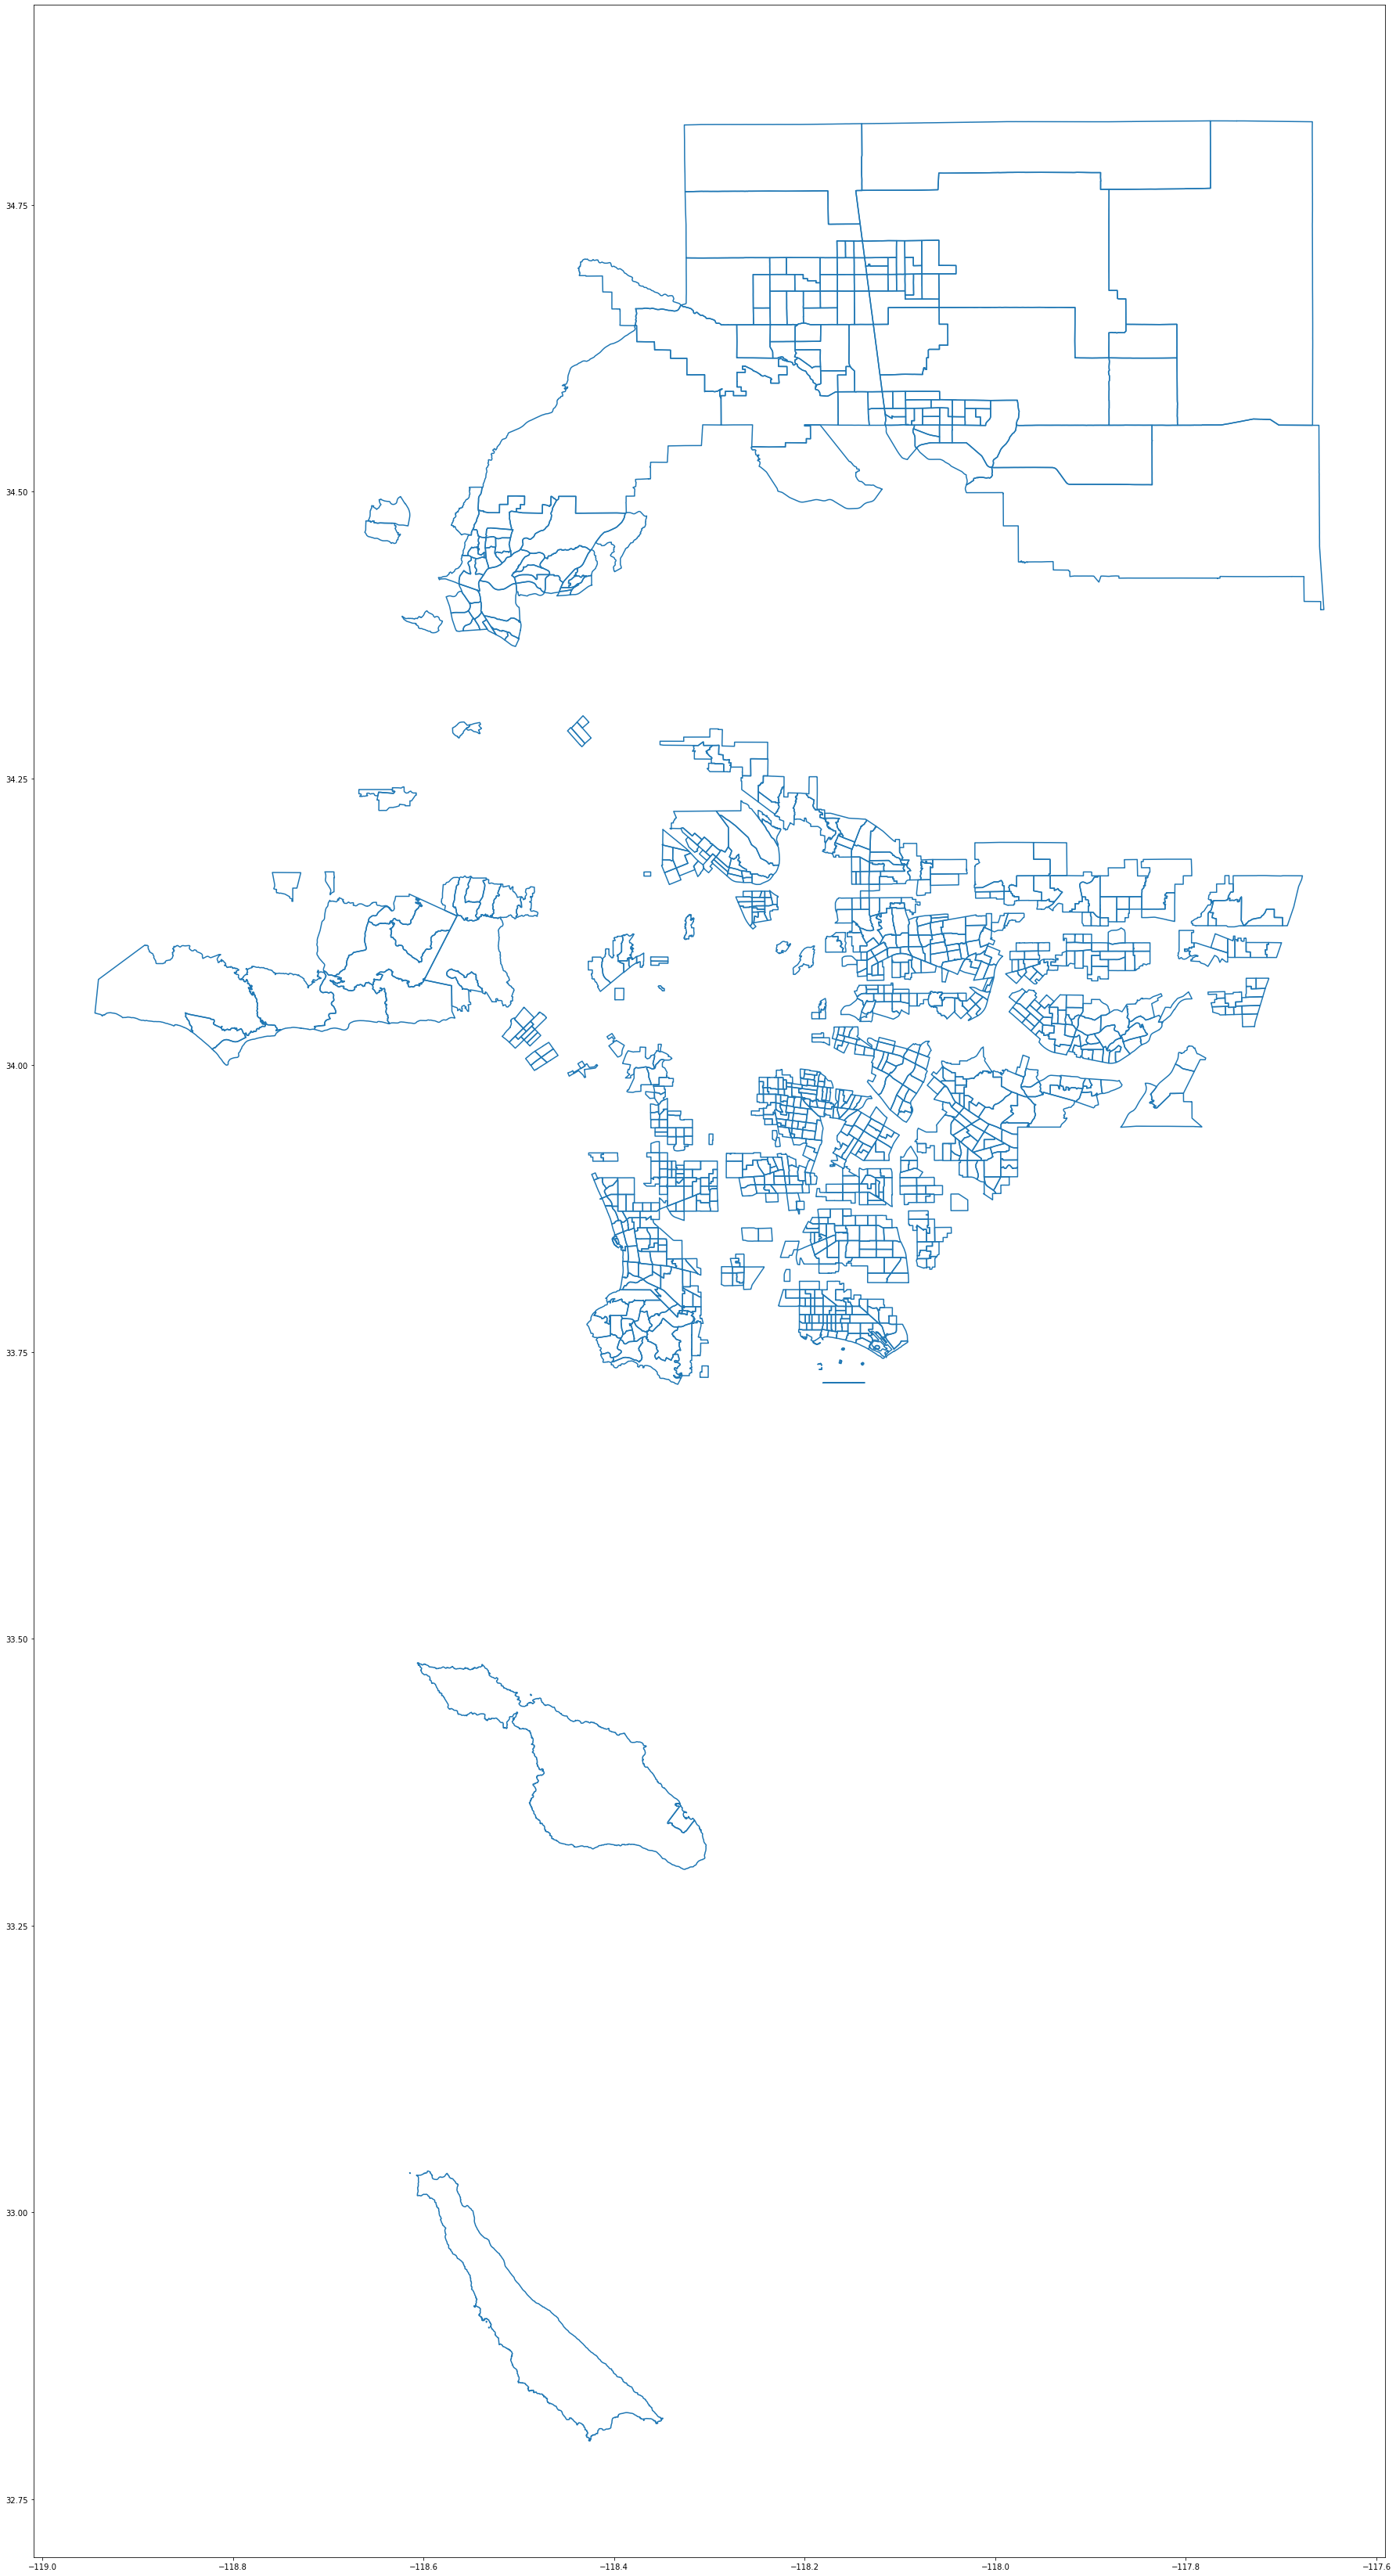

In [ ]:
counties_with_no_sensors = counties[counties.Total_Sensors==0]
counties_with_no_sensors.boundary.plot()
plt.savefig('counties_with_no_sensors.jpg')

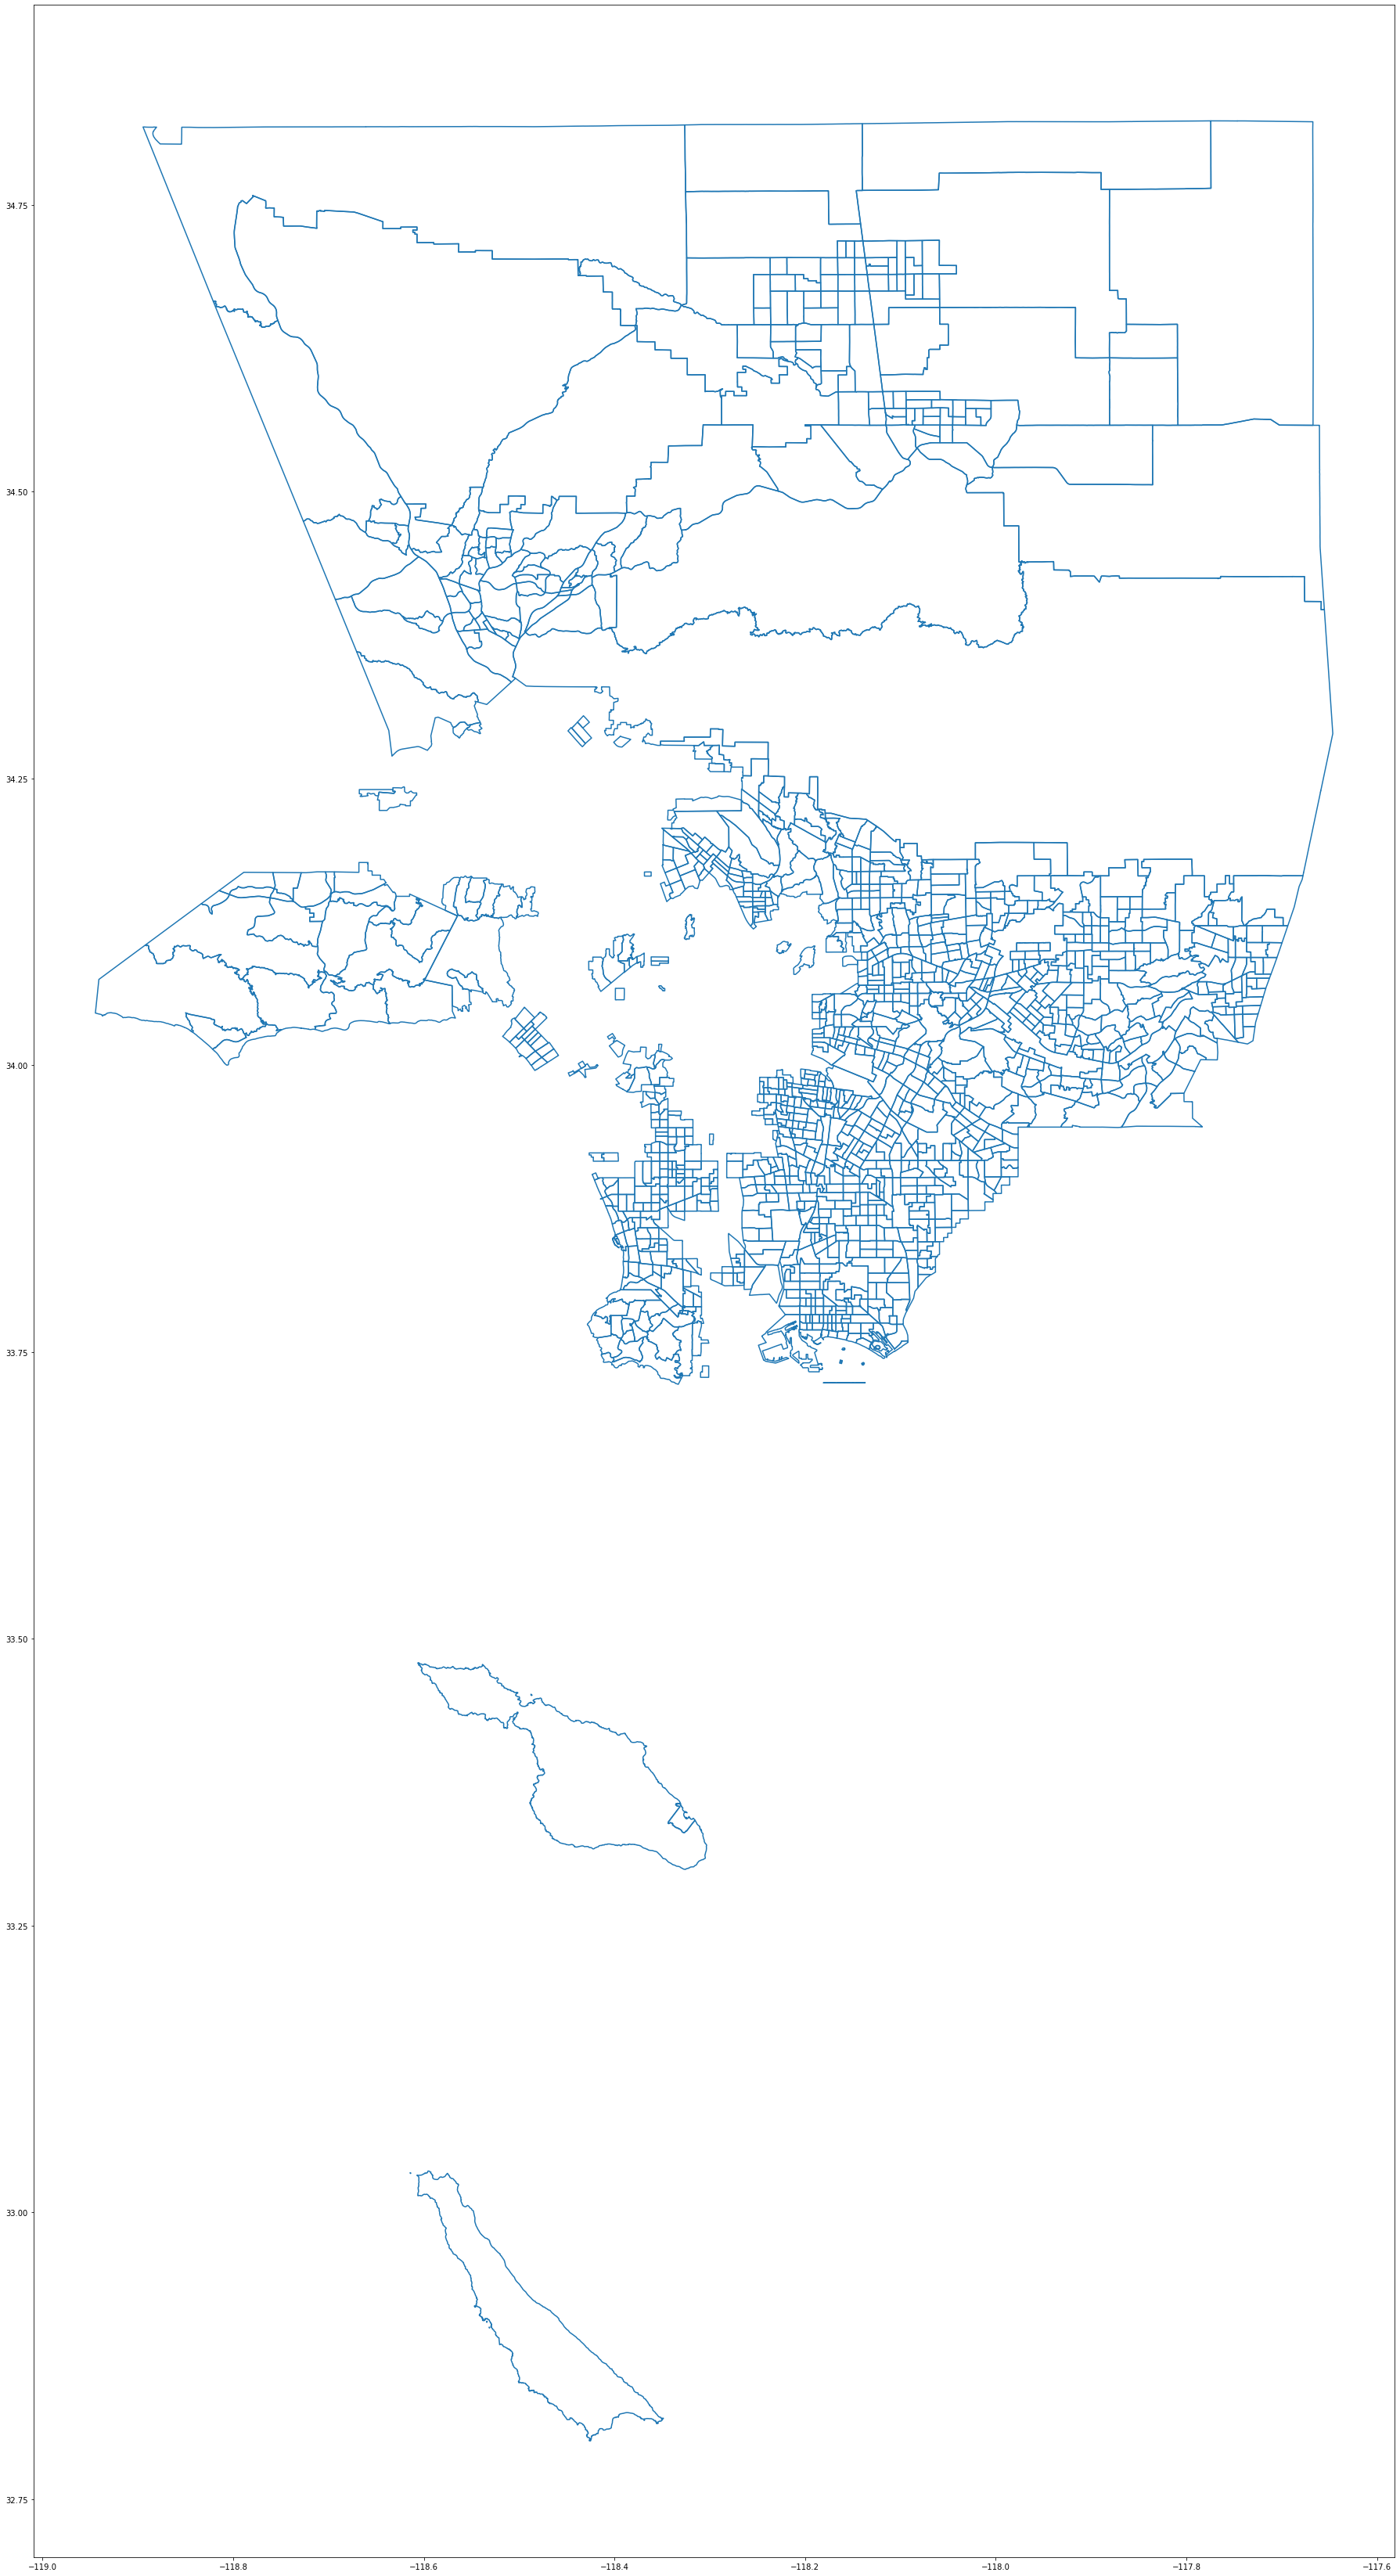

In [ ]:
counties_with_no_arterial_sensors = counties[counties.Arterial_Sensor_Count==0]
counties_with_no_arterial_sensors.boundary.plot()
plt.savefig('counties_with_no_arterial_sensors.jpg')

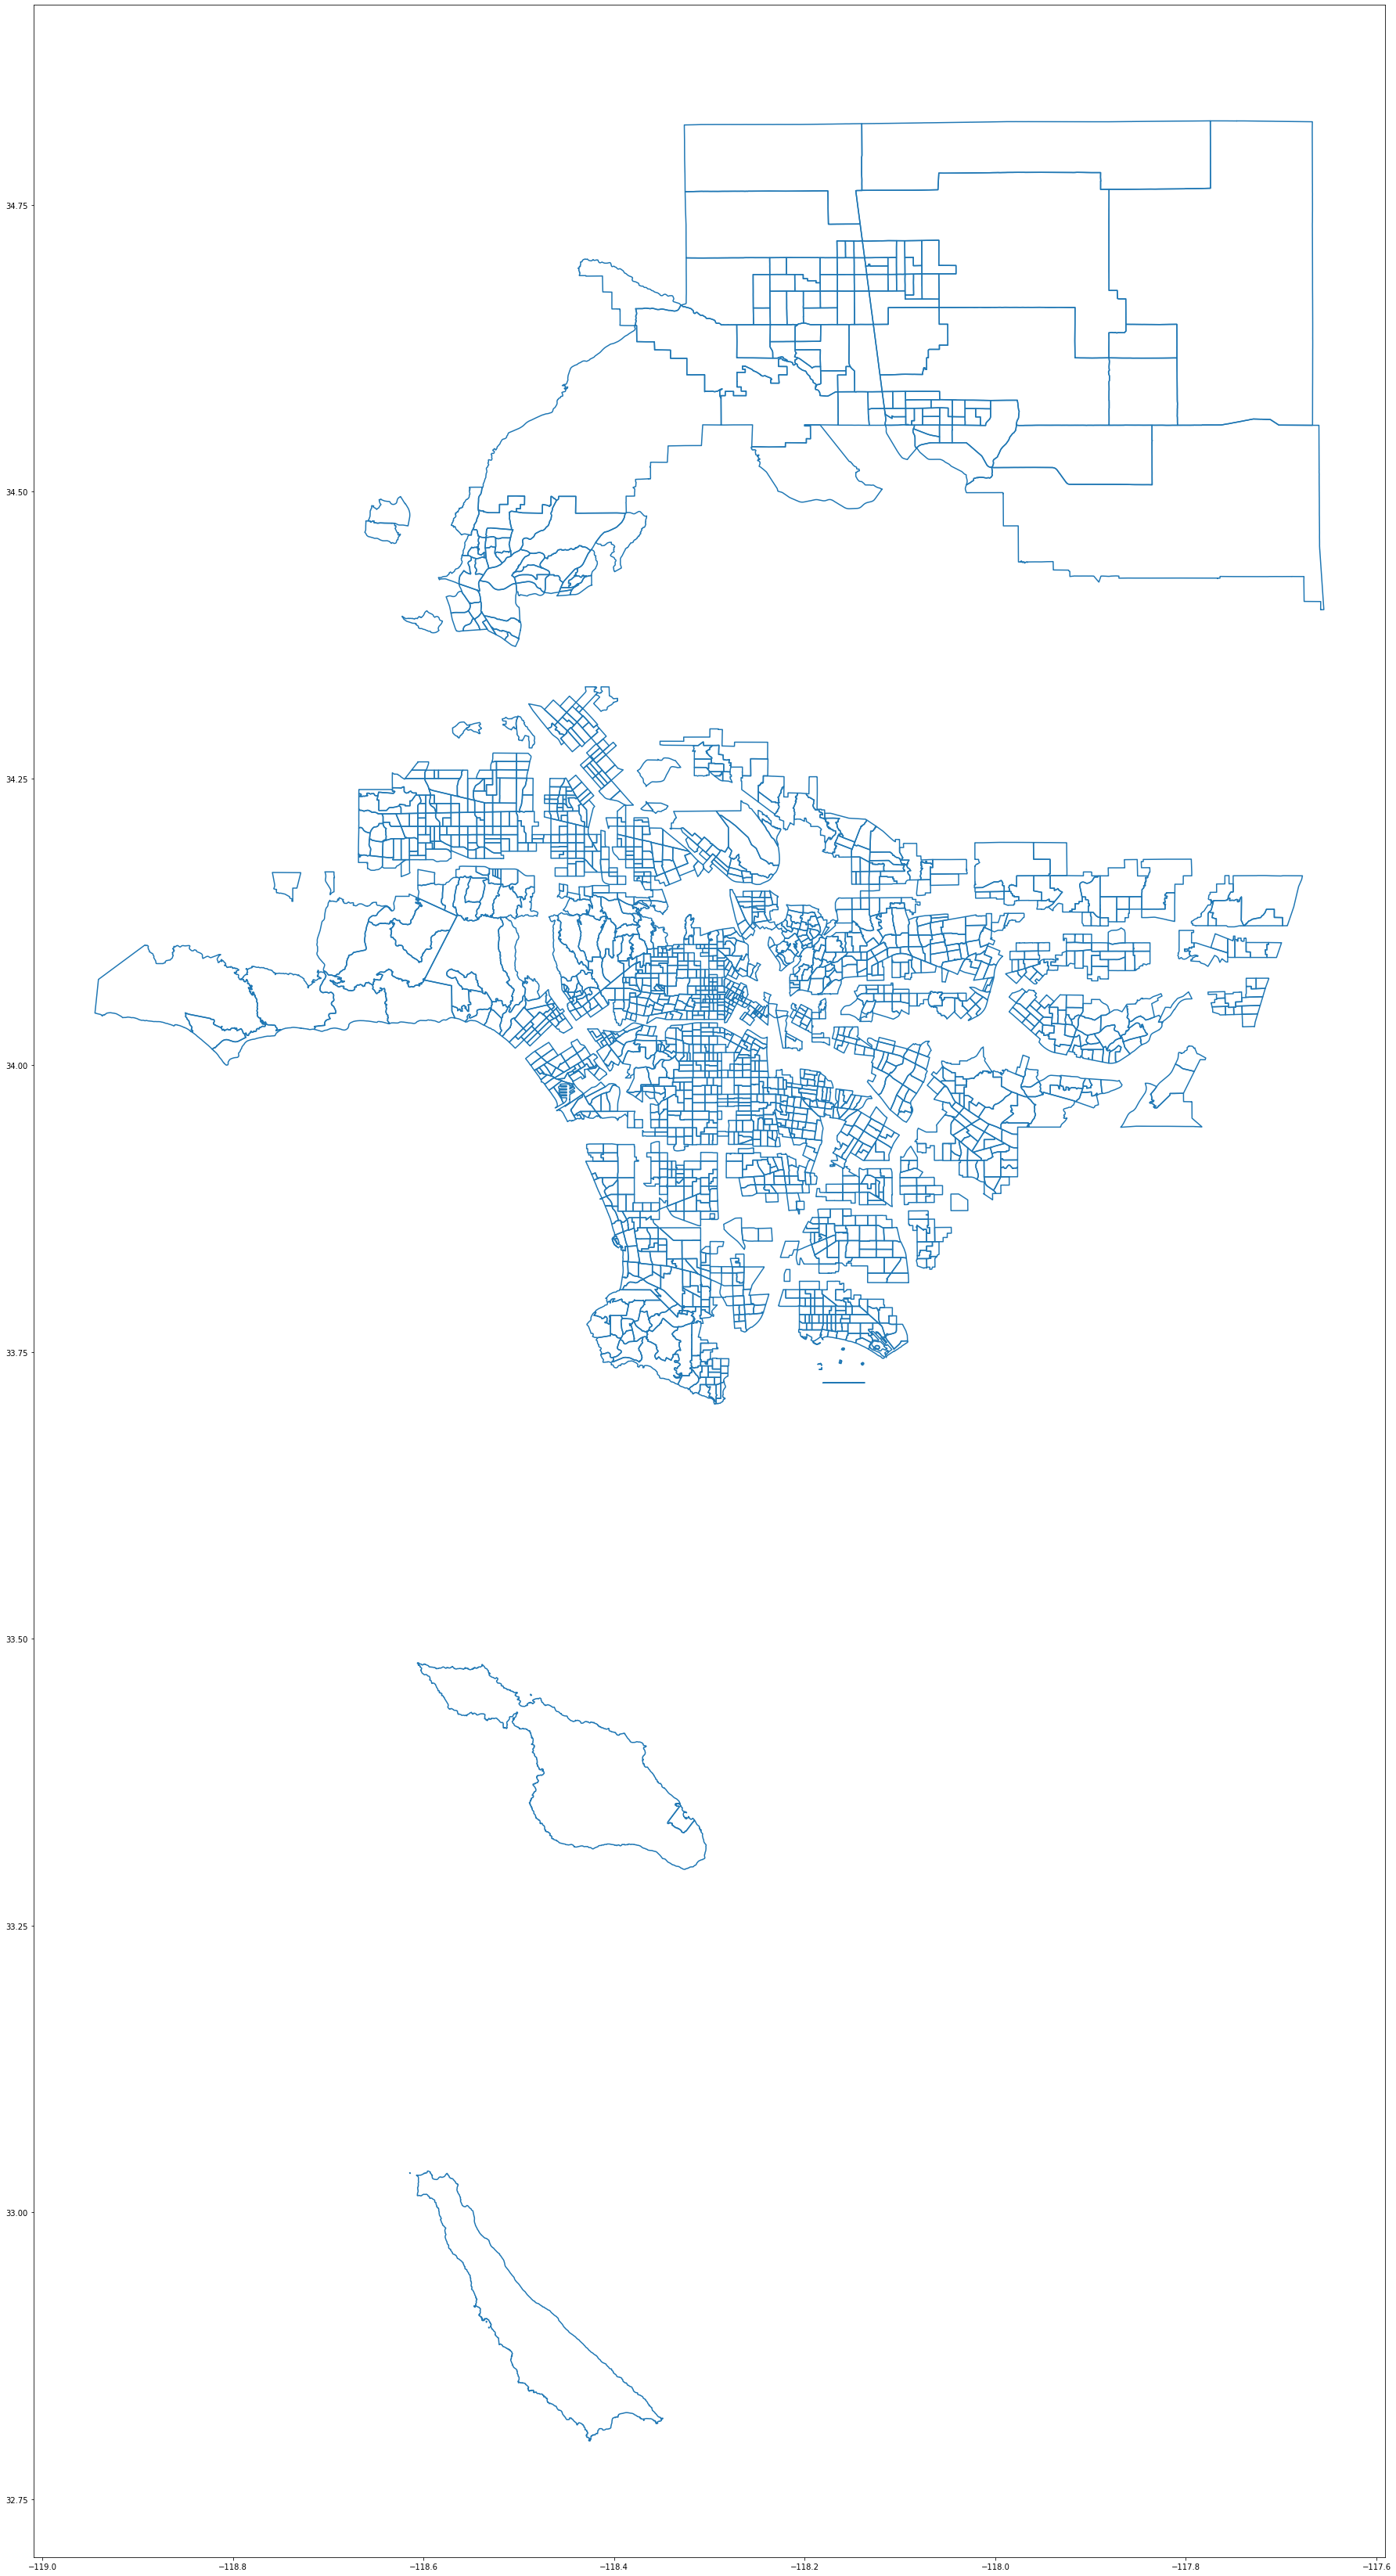

In [ ]:
counties_with_no_highway_sensors = counties[counties.Highway_Sensor_Count==0]
counties_with_no_highway_sensors.boundary.plot()
plt.savefig('counties_with_no_highway_sensors.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')